In [1]:
from pydriller import Repository
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from DrawGraphs import DrawGraphs
repo = DrawGraphs('zeeguu', 'api', 'zeeguu', False)

In [3]:
DG = repo.dependencies_digraph()
ADG = repo.abstracted_to_top_level(DG, 2)

In [4]:
REPO_DIR = 'https://github.com/zeeguu/api'

In [5]:
# for PyDriller to work we need to change directory to our local clone of the repo
%cd content/zeeguu-api

/Users/borch_and/Documents/GitHub/Architectural_Recovery/content/zeeguu-api


In [6]:
all_commits = list(Repository(REPO_DIR, only_in_branch="master").traverse_commits())

def print_out_commit_details(commits):
  for commit in commits:
      print(commit)
      for each in commit.modified_files:
          print(f"{commit.author.name} {each.change_type} {each.filename}\n -{each.old_path}\n -{each.new_path}")

print_out_commit_details(all_commits[0:1])

Mircea Lungu ModificationType.ADD LICENSE
 -None
 -LICENSE
Mircea Lungu ModificationType.ADD README.md
 -None
 -README.md
Mircea Lungu ModificationType.ADD s
 -None
 -s
Mircea Lungu ModificationType.ADD setup.py
 -None
 -setup.py
Mircea Lungu ModificationType.ADD zeeguu_api.wsgi
 -None
 -zeeguu_api.wsgi
Mircea Lungu ModificationType.ADD __init__.py
 -None
 -zeeguu_api/__init__.py
Mircea Lungu ModificationType.ADD __main__.py
 -None
 -zeeguu_api/__main__.py
Mircea Lungu ModificationType.ADD __init__.py
 -None
 -zeeguu_api/api/__init__.py
Mircea Lungu ModificationType.ADD download_content_from_url.py
 -None
 -zeeguu_api/api/download_content_from_url.py
Mircea Lungu ModificationType.ADD exercises.py
 -None
 -zeeguu_api/api/exercises.py
Mircea Lungu ModificationType.ADD feeds.py
 -None
 -zeeguu_api/api/feeds.py
Mircea Lungu ModificationType.ADD sessions.py
 -None
 -zeeguu_api/api/sessions.py
Mircea Lungu ModificationType.ADD smartwatch.py
 -None
 -zeeguu_api/api/smartwatch.py
Mircea Lungu 

In [7]:
from collections import defaultdict

commit_counts = defaultdict(int)

for commit in all_commits:
    for each in commit.modified_files:
        try:
            commit_counts [each.new_path] += 1
        except:
            pass

# sort by number of commits in decreasing order
sorted(commit_counts.items(), key=lambda x: x[1], reverse=True)[:42]

[(None, 211),
 ('zeeguu/core/model/article.py', 84),
 ('zeeguu_api/api/dashboard.py', 80),
 ('zeeguu_api/api/translate_and_bookmark.py', 78),
 ('zeeguu_api/api/teacher_dashboard.py', 76),
 ('zeeguu/core/content_retriever/article_downloader.py', 74),
 ('requirements.txt', 69),
 ('zeeguu/core/model/bookmark.py', 68),
 ('zeeguu/core/content_recommender/elastic_recommender.py', 55),
 ('zeeguu/core/elastic/elastic_query_builder.py', 54),
 ('README.md', 52),
 ('zeeguu_api/api/feeds.py', 51),
 ('zeeguu_api/app.py', 51),
 ('zeeguu/core/emailer/zeeguu_mailer.py', 51),
 ('zeeguu/core/model/user.py', 49),
 ('zeeguu/core/model/video.py', 47),
 ('setup.py', 46),
 ('zeeguu/core/model/__init__.py', 46),
 ('zeeguu_api/api/__init__.py', 44),
 ('zeeguu/core/elastic/indexing.py', 42),
 ('zeeguu/api/endpoints/translation.py', 40),
 ('zeeguu/core/word_scheduling/basicSR/basicSR.py', 39),
 ('Dockerfile', 37),
 ('.travis.yml', 34),
 ('zeeguu/core/model/user_activitiy_data.py', 34),
 ('docker-compose.yml', 33

In [8]:
from pydriller import ModificationType

commit_counts = {}

for commit in all_commits:
    for modification in commit.modified_files:

        new_path = modification.new_path
        old_path = modification.old_path

        try:

            if modification.change_type == ModificationType.RENAME:
                commit_counts[new_path]=commit_counts.get(old_path,0)+1
                commit_counts.pop(old_path)

            elif modification.change_type == ModificationType.DELETE:
                commit_counts.pop(old_path, '')

            elif modification.change_type == ModificationType.ADD:
                commit_counts[new_path] = 1

            else: # modification to existing file
                    commit_counts [old_path] += 1
        except Exception as e:
            print("something went wrong with: " + str(modification))
            pass

sorted(commit_counts.items(), key=lambda x:x[1], reverse=True)

something went wrong with: <pydriller.domain.commit.ModifiedFile object at 0x1271815b0>
something went wrong with: <pydriller.domain.commit.ModifiedFile object at 0x127181f40>
something went wrong with: <pydriller.domain.commit.ModifiedFile object at 0x127181ac0>
something went wrong with: <pydriller.domain.commit.ModifiedFile object at 0x1271635b0>


[('zeeguu/api/endpoints/translation.py', 129),
 ('zeeguu/core/model/article.py', 94),
 ('zeeguu/api/app.py', 80),
 ('zeeguu/core/model/bookmark.py', 80),
 ('zeeguu/core/content_retriever/article_downloader.py', 76),
 ('requirements.txt', 65),
 ('zeeguu/core/content_recommender/elastic_recommender.py', 57),
 ('zeeguu/core/elastic/elastic_query_builder.py', 57),
 ('zeeguu/api/endpoints/__init__.py', 57),
 ('zeeguu/api/endpoints/exercises.py', 57),
 ('zeeguu/api/endpoints/feature_toggles.py', 56),
 ('zeeguu/core/model/user.py', 54),
 ('README.md', 52),
 ('zeeguu/core/emailer/zeeguu_mailer.py', 52),
 ('zeeguu/core/model/__init__.py', 49),
 ('zeeguu/core/model/video.py', 47),
 ('setup.py', 46),
 ('zeeguu/api/endpoints/user.py', 46),
 ('zeeguu/api/endpoints/search.py', 44),
 ('zeeguu/api/endpoints/user_articles.py', 43),
 ('zeeguu/core/elastic/indexing.py', 42),
 ('zeeguu/api/endpoints/bookmarks_and_words.py', 42),
 ('zeeguu/core/word_scheduling/basicSR/basicSR.py', 39),
 ('zeeguu/api/endpoi

In [9]:
def module_name_from_rel_path(full_path):

    # e.g. ../core/model/user.py -> zeeguu.core.model.user

    file_name = full_path.replace("/__init__.py","")
    file_name = file_name.replace("/",".")
    file_name = file_name.replace(".py","")
    return file_name


assert ("tools.migrations.teacher_dashboard_migration_1.upgrade" == module_name_from_rel_path("tools/migrations/teacher_dashboard_migration_1/upgrade.py"))

assert ("zeeguu.api") == module_name_from_rel_path("zeeguu/api/__init__.py")

In [10]:
def top_level_package(module_name, depth=1):
    components = module_name.split(".")
    return ".".join(components[:depth])

assert (top_level_package("zeeguu.core.model.util") == "zeeguu")
assert (top_level_package("zeeguu.core.model.util", 2) == "zeeguu.core")

In [17]:
%cd ../..

/Users/borch_and/Documents/GitHub/Architectural_Recovery


In [19]:
package_activity = defaultdict(int)

for path, count in commit_counts.items():
    if ".py" in str(path):
        l2_module = top_level_package(module_name_from_rel_path(path), 2)
        package_activity[l2_module] += count

sorted_sizes = sorted(package_activity.items(), key=lambda x: x[1], reverse=True)

print(sorted_sizes)

# store the top level packages in a file as json
import json
with open("top_level_packages.json", "w") as f:
    json.dump(package_activity, f)

[('zeeguu.core', 2060), ('zeeguu.api', 1196), ('tools.old', 175), ('setup', 46), ('tools.update_article_content', 33), ('tools.report_generator', 33), ('tools.feed_retrieval', 21), ('tools._playground', 16), ('zeeguu.config', 15), ('tools.evaluate_infer_topics', 15), ('tools.activity_monitor', 14), ('tools.send_subscription_emails', 12), ('tools.run_knn_similarity_search', 12), ('tools.update_bookmark_pointers', 12), ('tools.transform_text_into_context', 12), ('start', 11), ('tools.delete_dev_users', 11), ('tools.update_es_based_on_url_keyword', 11), ('tools.mysql_to_elastic_for_articles', 11), ('tools.article_crawler', 10), ('tools.anonymize_users', 9), ('tools.add_feed', 7), ('env_var_defs_default', 6), ('tools.feed_info', 6), ('tools.extract_articles_with_new_topics', 6), ('tools.set_new_topics_article', 6), ('tools.tokenizer_playground', 6), ('tools.remove_wrong_videos', 6), ('tools.mark_broken_articles', 5), ('tools.users_recently_active', 5), ('tools.crawl_summary', 4), ('tools.g

In [12]:

sizes = []

for n in ADG.nodes():
  sizes.append(package_activity[n])

print(sizes)

[1196, 15, 2, 2, 2060]


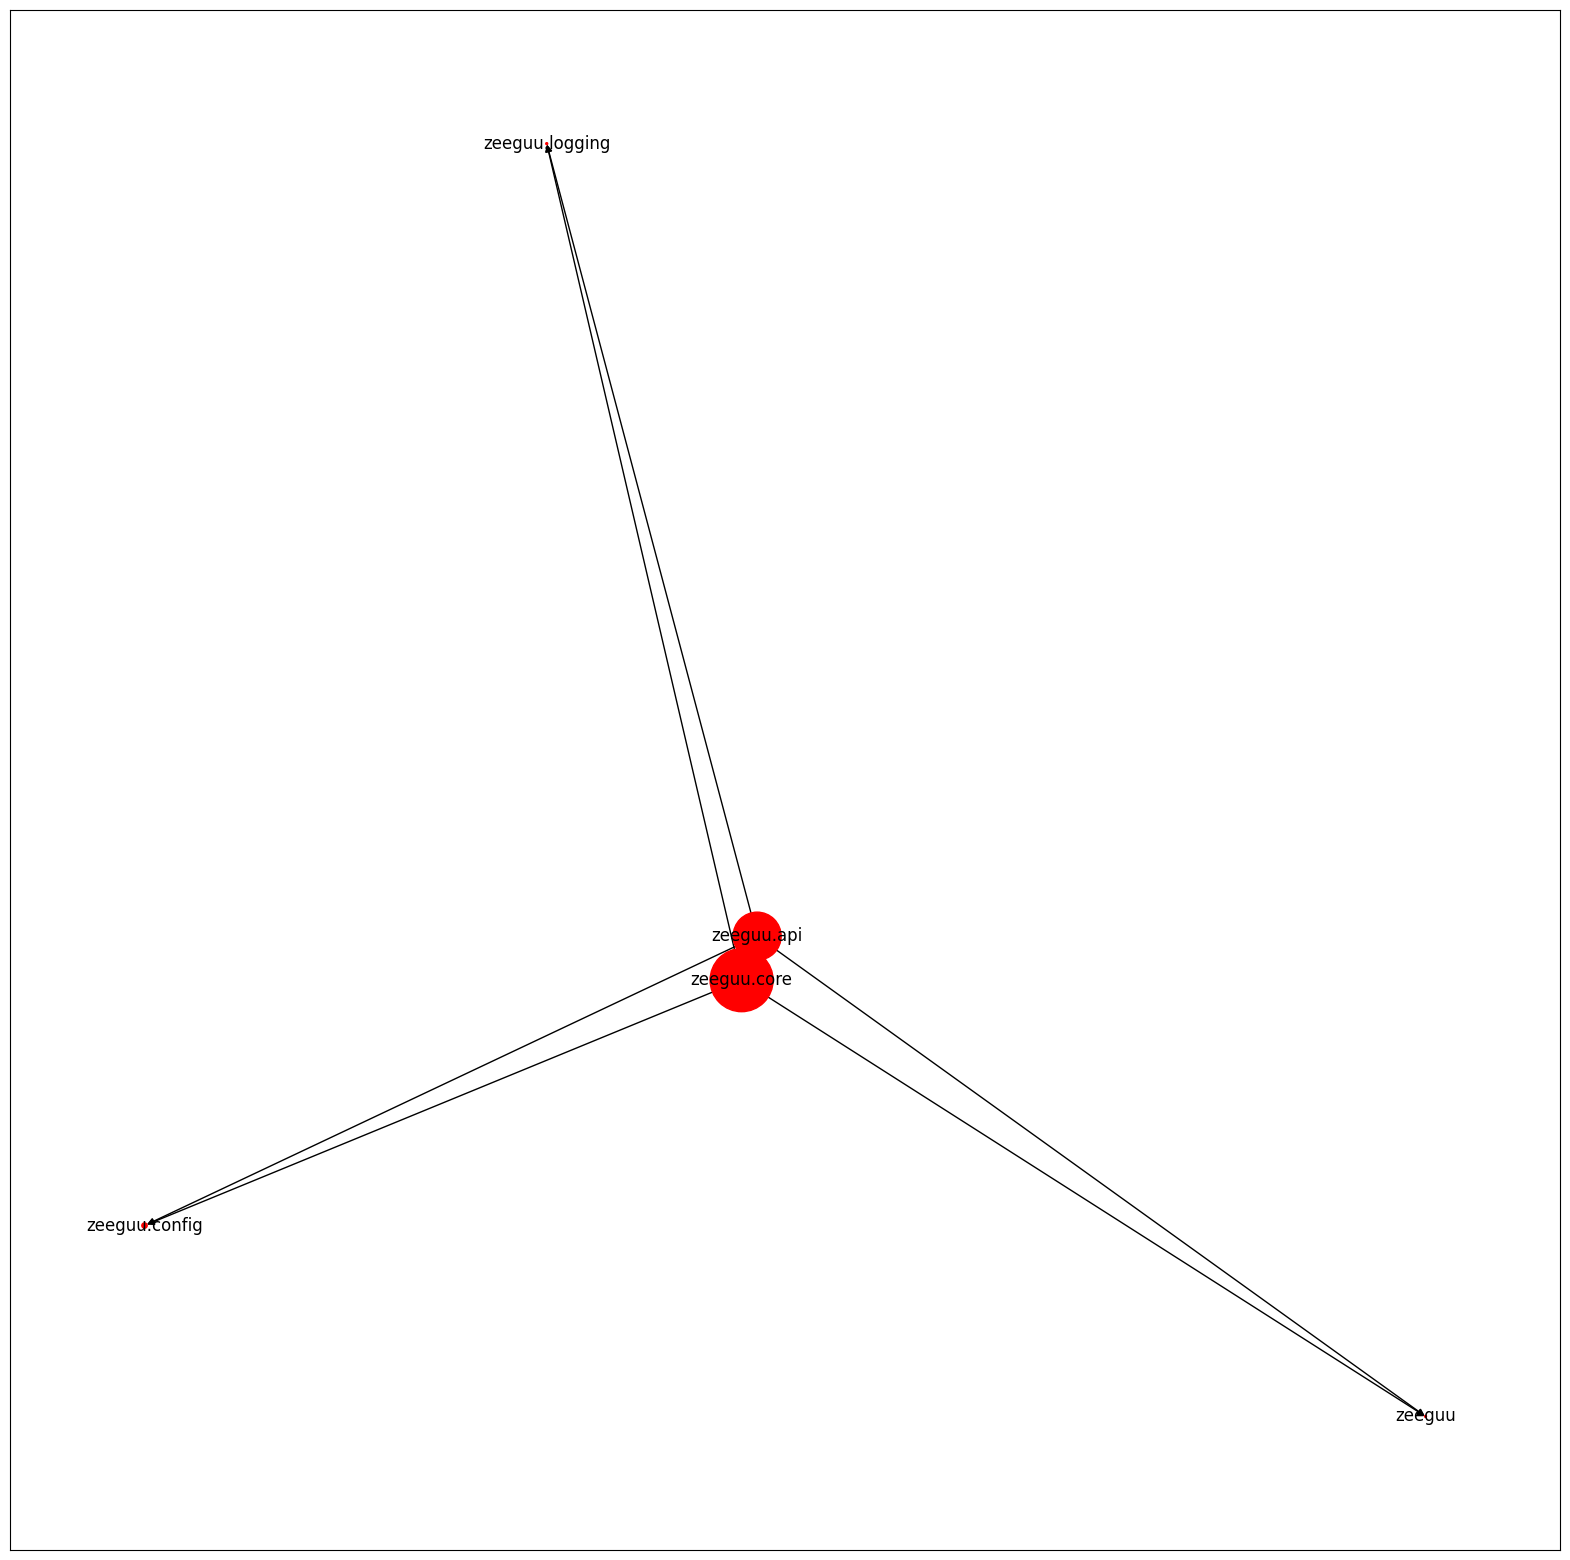

In [13]:
plt.figure(figsize=(20,20))
nx.draw_networkx(ADG, with_labels=True, node_size = sizes, node_color='r')
plt.show()